[![preview notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PySDM/blob/main/examples/PySDM_examples/deJong_Mackay_et_al_2023/fig_9.ipynb)
[![launch on mybinder.org](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM.git/main?urlpath=lab/tree/examples/PySDM_examples/deJong_Mackay_et_al_2023/fig_9.ipynb)
[![launch on Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/deJong_Mackay_et_al_2023/fig_9.ipynb)

#### based on Fig. 10 from [Straub et al. 2010 (J. Atmos. Sci. 67)  "_Numerical Investigation of Collision-Induced Breakup of Raindrops, Part II: Parameterizations of Coalescence Efficiencies and Fragment Size Distributions_"](https://doi.org/10.1175/2009JAS3175.1)

In [1]:
import os, sys
os.environ['NUMBA_THREADING_LAYER'] = 'workqueue'  # PySDM & PyMPDATA don't work with TBB; OpenMP has extra dependencies on macOS
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples', 'PySDM')

In [2]:
from matplotlib import pyplot
import matplotlib
from PySDM_examples.deJong_Mackay_et_al_2023 import run_to_steady_state, get_straub_fig10_data, get_straub_fig10_init
from open_atmos_jupyter_utils import show_plot
import numpy as np
from PySDM.physics.constants import si
import pickle as pkl
import time


In [3]:
(straub_x, straub_log_y, straub_dvdlnr_ss) = get_straub_fig10_data()
(straub_x_init, straub_y_init, straub_dvdlnr_init) = get_straub_fig10_init()

Success with run #1
ran Straub2010 for 32 superdroplets in 9.796871185302734 sec


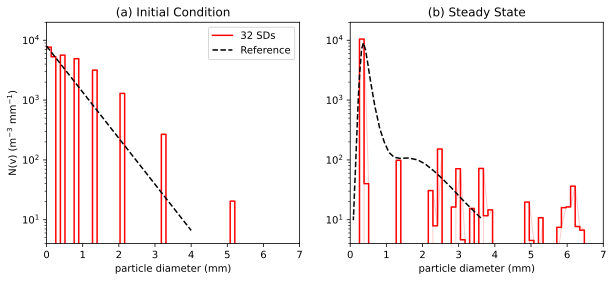

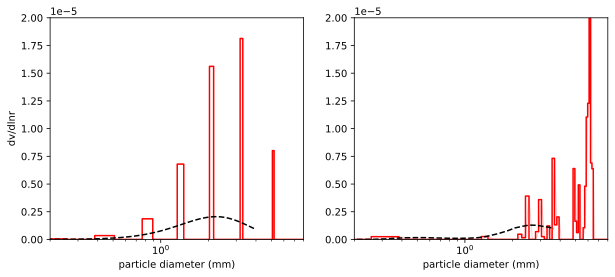

Success with run #1


Success with run #2


Success with run #3


Success with run #4


Success with run #5


Success with run #6


Error in steady state sim for 1024 superdroplets, moving on with dt=0.5


Success with run #7


Success with run #8


Success with run #9


Success with run #10
ran Straub2010 for 1024 superdroplets in 108.6907148361206 sec


Error in steady state sim for 16384 superdroplets, moving on with dt=0.5


Success with run #1


Success with run #2


Success with run #3


Success with run #4


Error in steady state sim for 16384 superdroplets, proceeding to next iteration


Error in steady state sim for 16384 superdroplets, moving on with dt=0.5


Success with run #6


Error in steady state sim for 16384 superdroplets, proceeding to next iteration


Success with run #8


Success with run #9


Success with run #10
ran Straub2010 for 16384 superdroplets in 789.2925410270691 sec


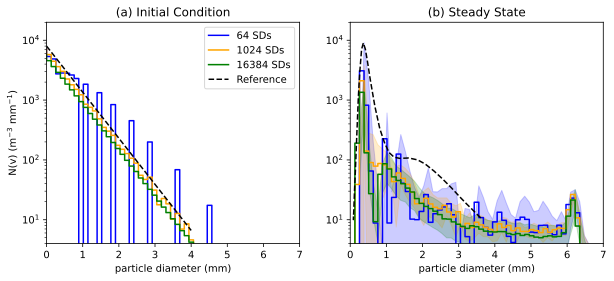

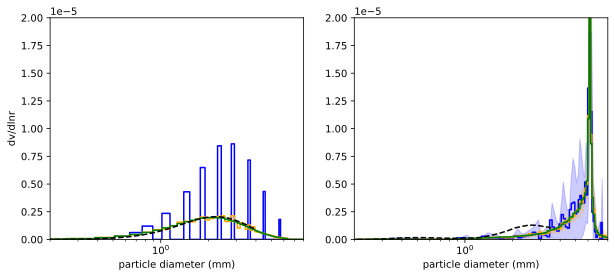

Success with run #6
Error in steady state sim for 1024 superdroplets, moving on with dt=0.5
Success with run #7
Success with run #8
Success with run #9
Success with run #10
ran Straub2010 for 1024 superdroplets in 13070.641508340836 sec
Error in steady state sim for 16384 superdroplets, moving on with dt=0.5
Success with run #1
Success with run #2
Success with run #3
Success with run #4
Success with run #5
Success with run #6
Error in steady state sim for 16384 superdroplets, proceeding to next iteration
Success with run #8
Success with run #9
Success with run #10
ran Straub2010 for 16384 superdroplets in 13232.116261959076 sec


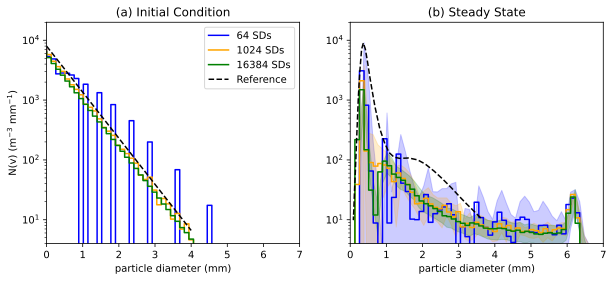

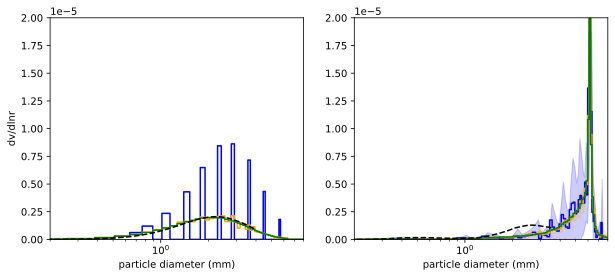

In [4]:
CI = 'CI' in os.environ
run_sims = True
parameterization = 'Straub2010'
dt = 1 * si.s
n_sds = (2**6, 2**10, 2**14) if not CI else (32,)
steps = (0, 7200) 
nruns = 10 if not CI else 1

colors = {32: 'red', 2**6: 'blue', 2**10: 'orange', 2**14: 'green'}

kwargs = {'nrows': 1, 'ncols': 2, 'figsize': (10, 4)}
fig, ax = pyplot.subplots(**kwargs)
fig2, ax2 = pyplot.subplots(**kwargs)      

# Obtain data
for n_sd in n_sds:
    lbl = f"{n_sd} SDs"
    if run_sims:
        t1 = time.time()
        run_to_steady_state(parameterization, n_sd, steps, nruns, dt=dt)
        t2 = time.time()
        print(f'ran {parameterization} for {n_sd} superdroplets in {t2 - t1} sec')
    data_filename = f'steadystate_{parameterization}_{n_sd}sd.pkl'
    with open(data_filename, 'rb') as handle:
        (x, y_ensemble, y2_ensemble, rates) = pkl.load(handle)
    
    # statistics
    # mass density
    y_mean = np.nanmean(y_ensemble, axis=0)
    y_std = np.nanstd(y_ensemble, axis=0)

    # number density
    y2_mean = np.nanmean(y2_ensemble, axis=0)
    y2_std = np.nanstd(y2_ensemble, axis=0)

    # Plotting
    cmap = matplotlib.colormaps['viridis']
    dr = np.diff(x) * si.um
    dr = np.concatenate([dr, [dr[-1]]])

    for (j, step) in enumerate(steps):
        idx = 1 if step != 0 else 0
        label = lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else ''
        ax[idx].step(
            2*x*si.mm,
            y2_mean[j]/2/dr * si.mm,
            linestyle='-',
            color=colors[n_sd],
            label=label
        )
        if step != 0:
            ax[idx].fill_between(
                2*x*si.mm,
                y2_mean[j]/2/dr * si.mm - y2_std[j]/2/dr * si.mm, 
                y2_mean[j]/2/dr * si.mm + y2_std[j]/2/dr * si.mm,
                color=colors[n_sd],
                alpha=0.2
            )            
        ax2[idx].step(
            2*x*si.mm,
            y_mean[j],
            linestyle='-',
            color=colors[n_sd],
            label=label
        )
        if step != 0:
            ax2[idx].fill_between(
                2*x*si.mm,
                y_mean[j] - y_std[j], 
                y_mean[j] + y_std[j],
                color=colors[n_sd],
                alpha=0.2
            )
            
# Reference data
kwargs = {"label": "Reference", "linestyle": "--", "color": "k"}
ax[0].plot(straub_x_init/si.mm, straub_y_init, **kwargs)
ax[1].plot(straub_x/si.mm, np.power(10, straub_log_y), **kwargs)
ax2[0].plot(straub_x_init/si.mm, straub_dvdlnr_init, **kwargs)
ax2[1].plot(straub_x/si.mm, straub_dvdlnr_ss / si.mm, **kwargs)

for _ax in (ax[0], ax[1]):
    _ax.set_yscale("log")
    _ax.set_xlim([0.0, 7.0])
    _ax.set_ylim([4.0, 2e4])
for _ax in (ax2[0], ax2[1]):
    _ax.set_xscale("log")
    _ax.set_xlim([0.2, 8.0])
    _ax.set_ylim([0.0, 2e-5])
for _ax in (ax[0], ax[1], ax2[0], ax2[1]):
    _ax.set_xlabel("particle diameter (mm)")

ax[0].set_ylabel("N(v) (m$^{-3}$ mm$^{-1})$")
ax2[0].set_ylabel("dv/dlnr")

ax[0].legend()
ax[0].set_title("(a) Initial Condition")
ax[1].set_title("(b) Steady State")
show_plot('fig9_straub_fig10.pdf', fig=fig)
show_plot('straub_dvdlnr.pdf', fig=fig2)